In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import resnet50
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50 as resnet50

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [4]:
IMG_SIZE = (224, 224)  # размер входного изображения сети

In [5]:
#переопределил условие на собак в регулярном выражении
import re
from random import shuffle
from glob import glob

train_files = glob('C:/Users/Arsen/Downloads/data_science/lectures-master/lectures-master/006/input/train/train/*.jpg')
test_files = glob('C:/Users/Arsen/Downloads/data_science/lectures-master/lectures-master/006/input/test/test/*.jpg')

# загружаем входное изображение и предобрабатываем
def load_image(path, target_size=IMG_SIZE):
    img = load_img(path, target_size=target_size)  # загрузка и масштабирование изображения
    array = img_to_array(img)
    return preprocess_input(array)  # предобработка для VGG16

# генератор для последовательного чтения обучающих данных с диска
def fit_generator(files, batch_size=32):
    while True:
        shuffle(files)
        for k in range(len(files) // batch_size):
            i = k * batch_size
            j = i + batch_size
            if j > len(files):
                j = - j % len(files)
            x = np.array([load_image(path) for path in files[i:j]])
            y = np.array([1. if re.match('.*dog', path) else 0. for path in files[i:j]])
            yield (x, y)

# генератор последовательного чтения тестовых данных с диска
def predict_generator(files):
    while True:
        for path in files:
            yield np.array([load_image(path)])

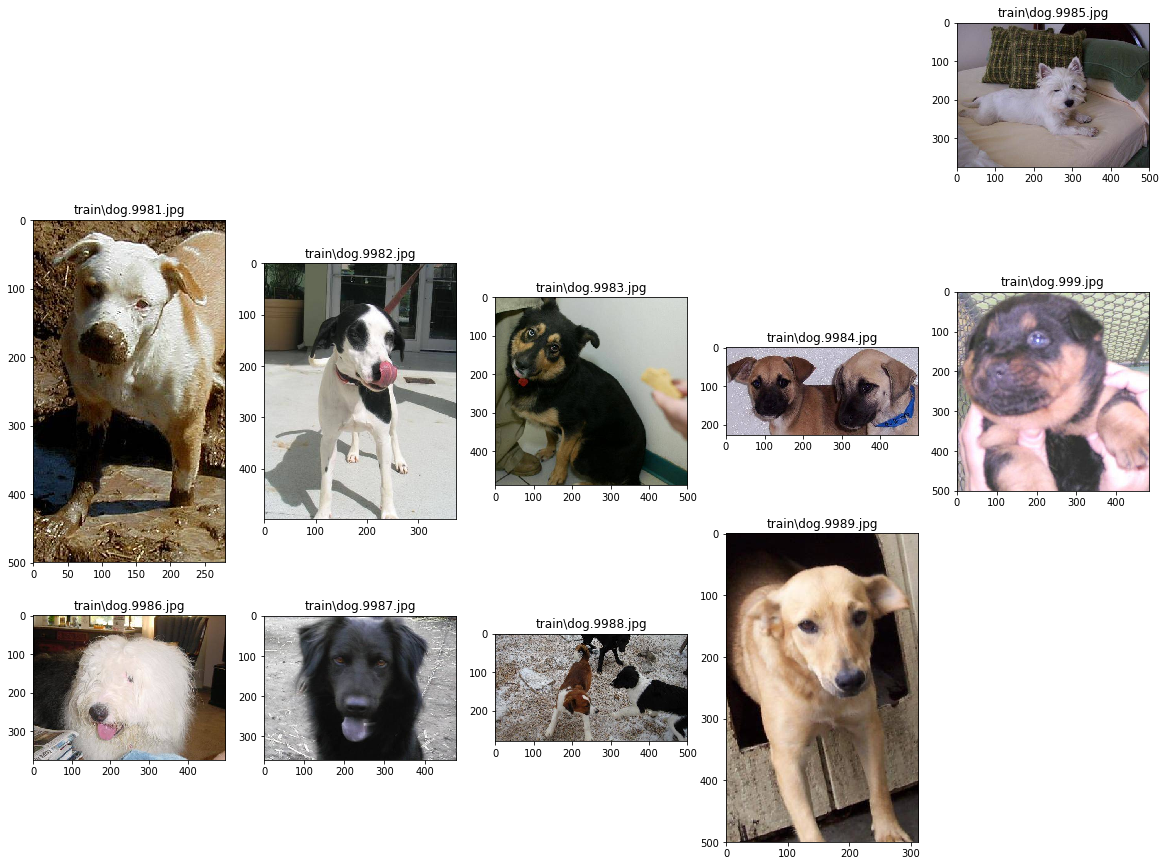

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 20))
for i, path in enumerate(train_files[-20:-10], 1):
    subplot = fig.add_subplot(i // 5 + 1, 5, i)
    plt.imshow(plt.imread(path));
    subplot.set_title('%s' % path.split('/')[-1]);

In [7]:
#проверяю, что в разметке есть и кошки и собаки
y = np.array([1. if re.match('.*dog', path) else 0. for path in train_files])
print(np.mean(y), len(test_files))

0.5 12500


In [46]:
base_model = resnet50(include_top = False,
                   weights = 'imagenet',
                   input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3))

In [48]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

In [47]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [13]:
base_model.summary?

activation_21 (Activation)      (None, 28, 28, 512)  0           add_6[0][0]                      
__________________________________________________________________________________________________
81 res4a_branch2a (Conv2D)         (None, 14, 14, 256)  131328      activation_21[0][0]              
__________________________________________________________________________________________________
82 bn4a_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4a_branch2a[0][0]             
__________________________________________________________________________________________________
83 activation_22 (Activation)      (None, 14, 14, 256)  0           bn4a_branch2a[0][0]              
__________________________________________________________________________________________________
res4a_branch2b (Conv2D)         (None, 14, 14, 256)  590080      activation_22[0][0]              
__________________________________________________________________________________________________
bn4a_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_23 (Activation)      (None, 14, 14, 256)  0           bn4a_branch2b[0][0]              
__________________________________________________________________________________________________
res4a_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_23[0][0]              
__________________________________________________________________________________________________
res4a_branch1 (Conv2D)          (None, 14, 14, 1024) 525312      activation_21[0][0]              
__________________________________________________________________________________________________
bn4a_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4a_branch2c[0][0]             
__________________________________________________________________________________________________
bn4a_branch1 (BatchNormalizatio (None, 14, 14, 1024) 4096        res4a_branch1[0][0]              
__________________________________________________________________________________________________
add_7 (Add)                     (None, 14, 14, 1024) 0           bn4a_branch2c[0][0]              

In [49]:
#вывожу номера слоев
i=0
for layer in base_model.layers:
    print(i, ', ', layer.name)
    i+=1

0 ,  input_3
1 ,  conv1_pad
2 ,  conv1
3 ,  bn_conv1
4 ,  activation_98
5 ,  pool1_pad
6 ,  max_pooling2d_2
7 ,  res2a_branch2a
8 ,  bn2a_branch2a
9 ,  activation_99
10 ,  res2a_branch2b
11 ,  bn2a_branch2b
12 ,  activation_100
13 ,  res2a_branch2c
14 ,  res2a_branch1
15 ,  bn2a_branch2c
16 ,  bn2a_branch1
17 ,  add_32
18 ,  activation_101
19 ,  res2b_branch2a
20 ,  bn2b_branch2a
21 ,  activation_102
22 ,  res2b_branch2b
23 ,  bn2b_branch2b
24 ,  activation_103
25 ,  res2b_branch2c
26 ,  bn2b_branch2c
27 ,  add_33
28 ,  activation_104
29 ,  res2c_branch2a
30 ,  bn2c_branch2a
31 ,  activation_105
32 ,  res2c_branch2b
33 ,  bn2c_branch2b
34 ,  activation_106
35 ,  res2c_branch2c
36 ,  bn2c_branch2c
37 ,  add_34
38 ,  activation_107
39 ,  res3a_branch2a
40 ,  bn3a_branch2a
41 ,  activation_108
42 ,  res3a_branch2b
43 ,  bn3a_branch2b
44 ,  activation_109
45 ,  res3a_branch2c
46 ,  res3a_branch1
47 ,  bn3a_branch2c
48 ,  bn3a_branch1
49 ,  add_35
50 ,  activation_110
51 ,  res3b_branch2a
5

In [62]:
#Это наверное, 10я попытка обучиться с различными комбинациями и перестановками слоев, и методов оптимизации
# На данной конфигурации запустил второй раз. Первый раз дождался до 33 эпохи и остановил
# видимо модель запомнила вычисления и начальную точку взяла из прошлого опыта

#Spoiler 1
# batch norm
# dense 200-300
# dropout 0.5
# dense 1
 

x = base_model.layers[80].output

x = keras.layers.Dropout(rate=0.5, noise_shape=None, seed=None)(x)


x = keras.layers.BatchNormalization()(x)

x = keras.layers.Flatten()(x)


x = keras.layers.Dense(256, activation='relu')(x)

x = keras.layers.Flatten()(x)


x = keras.layers.Dense(1,  # один выход
                activation='sigmoid',  # функция активации  
                kernel_regularizer=keras.regularizers.l1(1e-4))(x)
model = Model(inputs=base_model.input, outputs=x)

In [63]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [64]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [66]:
#взял 40 эпох, чтобы хватило терпения
shuffle(train_files)  # перемешиваем обучающую выборку

train_val_split = 100  # число изображений в валидационной выборке

validation_data = next(fit_generator(train_files[:train_val_split], train_val_split))

# запускаем процесс обучения
model.fit_generator(fit_generator(train_files[train_val_split:]),  # данные читаем функцией-генератором
        steps_per_epoch=10,  # число вызовов генератора за эпоху
        epochs=40,  # число эпох обучения
        validation_data=validation_data)

Epoch 1/40
10/10 [==============================] - 76s 8s/step - loss: 0.2305 - acc: 0.9094 - val_loss: 0.2236 - val_acc: 0.9100
Epoch 2/40
10/10 [==============================] - 76s 8s/step - loss: 0.2579 - acc: 0.8906 - val_loss: 0.2243 - val_acc: 0.9100
Epoch 3/40
10/10 [==============================] - 76s 8s/step - loss: 0.2155 - acc: 0.9250 - val_loss: 0.2337 - val_acc: 0.9100
Epoch 4/40
10/10 [==============================] - 76s 8s/step - loss: 0.1961 - acc: 0.9344 - val_loss: 0.2246 - val_acc: 0.9100
Epoch 5/40
10/10 [==============================] - 76s 8s/step - loss: 0.2247 - acc: 0.9062 - val_loss: 0.2145 - val_acc: 0.8900
Epoch 6/40
10/10 [==============================] - 75s 8s/step - loss: 0.1859 - acc: 0.9250 - val_loss: 0.2305 - val_acc: 0.9000
Epoch 7/40
10/10 [==============================] - 76s 8s/step - loss: 0.2039 - acc: 0.9156 - val_loss: 0.2101 - val_acc: 0.9000
Epoch 8/40
10/10 [==============================] - 76s 8s/step - loss: 0.1851 - acc: 0.93

In [36]:
model.save('cats-dogs-resnet50.hdf5')

In [ ]:
#model.load_weights('cats-dogs-resnet50.hdf5', by_name=False)

In [67]:
pred = model.predict_generator(predict_generator(test_files), len(test_files), max_queue_size=500)

In [20]:
pred

array([[1.00000000e+00],
       [3.99859069e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.07345440e-22],
       [3.15452754e-01],
       [1.00000000e+00],
       [9.99848247e-01],
       [8.33753177e-27],
       [1.10340475e-14],
       [4.33147007e-17],
       [6.61152001e-07],
       [5.17863329e-18],
       [1.79443386e-31],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.22128872e-20],
       [1.34771035e-04],
       [1.22763322e-05],
       [1.00000000e+00],
       [9.99993682e-01],
       [5.17979496e-12],
       [3.20810982e-11],
       [1.00236950e-27],
       [1.00000000e+00],
       [5.99552728e-02],
       [1.90031346e-12],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.17840157e-16],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.64395701e-02],


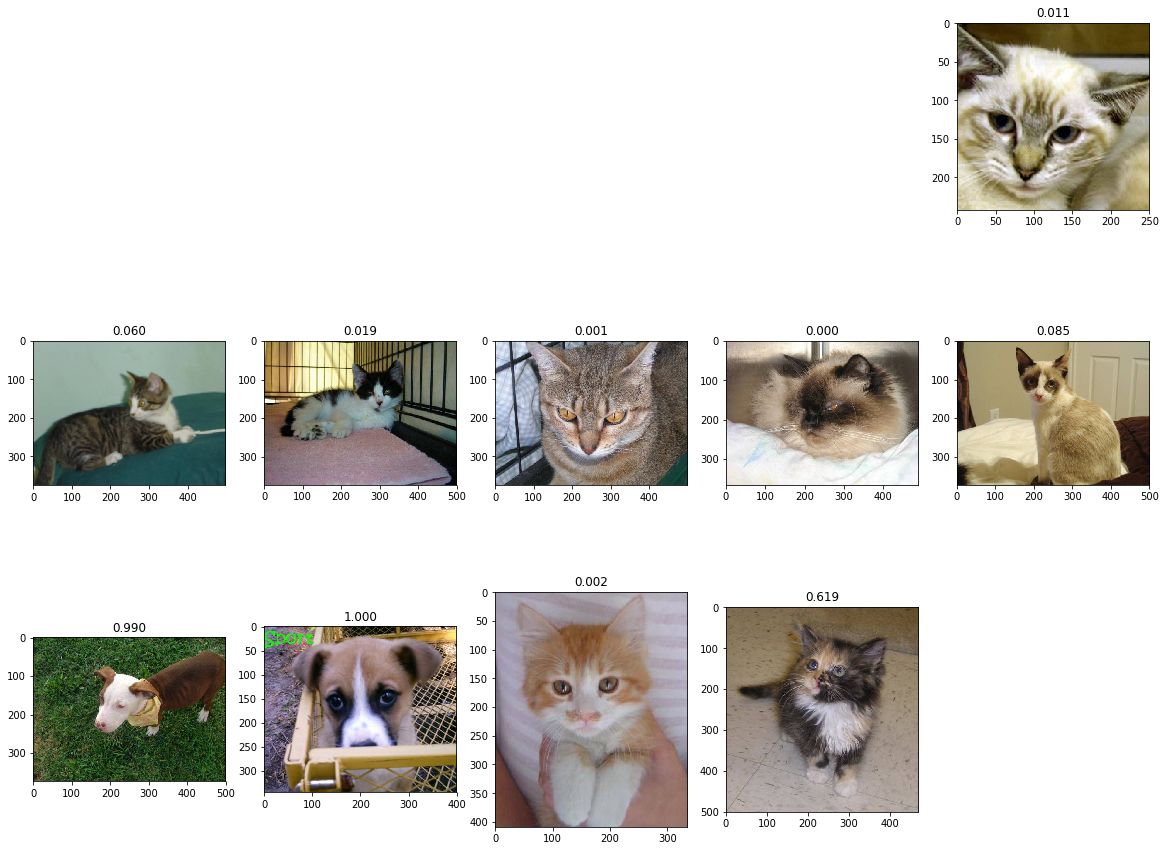

In [68]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 20))
for i, (path, score) in enumerate(zip(test_files[10:20], pred[10:20]), 1):
    subplot = fig.add_subplot(i // 5 + 1, 5, i)
    plt.imshow(plt.imread(path));
    subplot.set_title('%.3f' % score);

In [69]:
#поменял запись. У меня некорректно читались ID картинок

with open('submit.txt', 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, pred):
#        dst.write('%s,%f\n' % (re.search('(\d+)', path).group(0), score))
        dst.write('%s,%f\n' % (path[90:90+len(path[90:])-4], score))

In [ ]:
#sum(pred)

In [70]:
#проверка, что в предикте есть и кошки и собаки
np.mean(list(pred.flatten()))

0.51660967

In [25]:
print(len(pred), len(test_files))

100 12500


In [ ]:
#test loss =0.25678

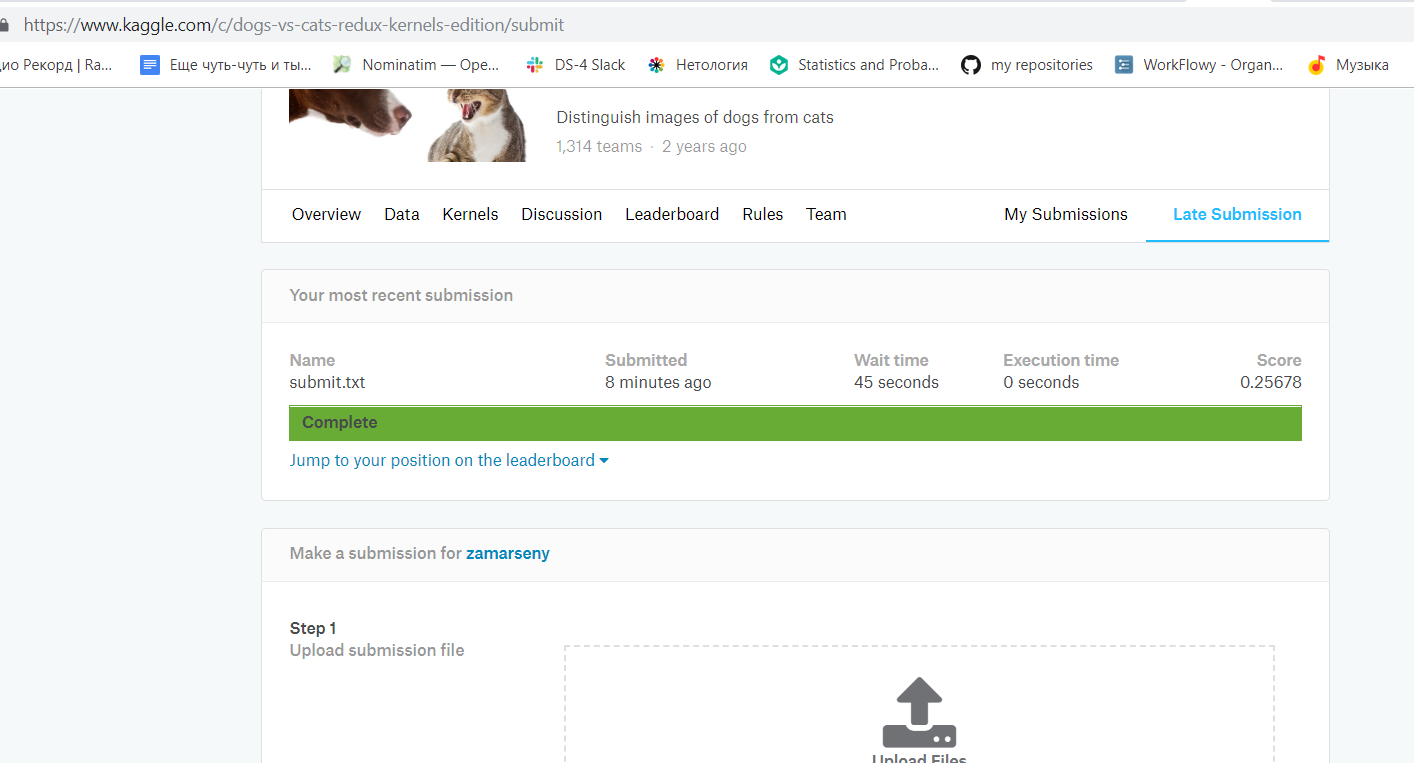